In [1]:
What_Were_Covering = [
"0. An end to end scikit workflow",
"1. Import the data and clean the data i,e getting data ready",
"2. Choose the right algorithom / estimator for the problem statement",
"3. Fit the model/algorithm and predict the values",
"4. Evaluating the model",
"5. Improve the model",
"6. Save and load the model",
"7. Putting it all togher"]
What_Were_Covering

['0. An end to end scikit workflow',
 '1. Import the data and clean the data i,e getting data ready',
 '2. Choose the right algorithom / estimator for the problem statement',
 '3. Fit the model/algorithm and predict the values',
 '4. Evaluating the model',
 '5. Improve the model',
 '6. Save and load the model',
 '7. Putting it all togher']

# 1. Get the data ready

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("C:\Jayaprakash\DataScience\Projects\Test Data\heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Create the list of features (X-Axis)
X = heart_disease.drop("target",axis=1)

#create the labels (Y-Axis)
y = heart_disease["target"]

# 2. Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
#clf.get_params() n_estimators=100

# 3. Fit the model to the training data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2)
clf.fit(X_train,y_train)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2


In [6]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [7]:
clf.predict_proba(x_test[:10])

NameError: name 'x_test' is not defined

In [ ]:
clf.predict(x_test[:10])

# 4. Evaluate the model on the training data and test data

In [ ]:
#Evaluating the model on the train data set and it will return 1.0 because it is testing against itself.
clf.score(X_train,y_train)

In [ ]:
#clf is now a model which is trained. Now we are passing the test data X,y and tesing it for accuracy. 
# The result will tell how accurecy is our model
clf_single_score = clf.score(X_test,y_test)
clf_single_score

In [ ]:
##Importing different type of metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Type Clasification report
print (classification_report(y_test,y_preds))

In [ ]:
#Type 2 : Confusion matrix
cm = confusion_matrix(y_test,y_preds)
cm

In [ ]:
#Type 2 : Confusion matrix represented visually using panda's  cross tab
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["Predicted Labels"] )

In [ ]:
##Type 3 : accuracy_score report
accuracy_score(y_test,y_preds)

In [ ]:
#This will loop from 10 to 100 for 10 instance and will assign to n_estimators and find the score 10 times.
np.random.seed(42)
for i in range(10,100,10):
    #print(f"Trying model with {i} estimator ....")
    model = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy for n_estimater {i} is : {model.score(X_test,y_test)*100}")
    

In [ ]:
##importing cross value to genrate more than one score for a data set
from sklearn.model_selection import cross_val_score

In [ ]:
#This is an example for cross_val_score, it returns results based on the cv value. if it is 4 , it will return 4 score, 
# we can compare or take mean of these values 
np.random.seed(42)

##This will return 5 score since cv=5
clf_cross_val_score = cross_val_score(clf,X,y,cv=5)
clf_cross_val_score, clf_cross_val_score.mean()

In [ ]:
clf_single_score , clf_cross_val_score.mean()

In [ ]:
#it is combinging both score and cross validation and we can judge which is better
for i in range(10,100,10):
    model = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy of n_estimators {i} with score is {model.score(X_test,y_test)*100:.2f}% ")
    print(f"Model accuracy of n_estimators {i} with cross_validation is {np.mean(cross_val_score(model,X,y,cv=5)):.3f} %")

# ROC Model

In [ ]:
y_prob = clf.predict_proba(X_test)
y_prob[:10]

In [ ]:
y_prob_positive = y_prob[:,1]
y_prob_positive

In [ ]:
%matplotlib inline
from sklearn.metrics import roc_curve
fpr, tpr, threashold = roc_curve(y_test,y_prob_positive )

In [ ]:
fpr

In [ ]:
import matplotlib.pyplot as plt


def plot_ROC_curve(fpr,tpr):
    plt.plot(fpr,tpr, color='red')
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(tpr)
    plt.show()

In [ ]:
plot_ROC_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
a = roc_auc_score(y_test,y_prob_positive)
a

In [ ]:
fpr, tpr, threashold = roc_curve(y_test,y_test )
plot_ROC_curve(fpr,tpr)

In [ ]:
#To install from jupyter notebook itself
import sys

!conda install --yes --prefix {sys.prefix} seaborn 

In [ ]:
import seaborn as sns

def drawheatmap(confusion_mat):
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_mat,annot=True,cbar=False)
    plt.xlabel("True")
    plt.ylabel("Prediction")
    

drawheatmap(confusion_matrix(y_test,y_preds))

# Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_diease = pd.read_csv("C:\Jayaprakash\DataScience\Projects\Test Data\heart-disease.csv")

X = heart_diease.drop(["target"], axis=1)
y = heart_diease["target"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=125)
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)
y_preds

In [ ]:
X_train.shape, type(X_train), len(X_train), X_train.size

In [ ]:
cv_acc = cross_val_score(clf,X,y,cv=5, scoring=None)
cv_acc, cv_acc.mean()

In [ ]:
cv_acc = cross_val_score(clf,X,y,cv=5, scoring="accuracy")
cv_acc, cv_acc.mean()

In [ ]:
cv_acc = cross_val_score(clf,X,y,cv=5, scoring="precision")
cv_acc, cv_acc.mean()

In [ ]:
cv_acc = cross_val_score(clf,X,y,cv=5, scoring="recall")
cv_acc, cv_acc.mean()

# Improving a model

Let's make 3 sets, training, validation and test.

# Tuning hyperparameters by hand

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [146]:
def evaluate_preds(y_true, y_preds):
    """
    Evalueates the performance comparing y_test (y_true) with y_preds
    """
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {
                    "Accuracy" : round(accuracy,2),
                    "precision" : round(precision,3),
                    "recall" : round(recall,3),
                    "f1" : round(f1,3)
                    }
    
    print(f"Accuracy value is : {accuracy*100:.3f}")  
    print(f"Precision value is : {precision:.3f}")  
    print(f"Recall value is : {recall:.3f}")  
    print(f"f1 value is : {f1:.3f}")  
    
    return metric_dict

In [147]:
evaluate_preds(y_test,y_preds)

Accuracy value is : 86.885
Precision value is : 0.853
Recall value is : 0.906
f1 value is : 0.879


{'Accuracy': 0.87, 'precision': 0.853, 'recall': 0.906, 'f1': 0.879}

In [148]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop(["target"],  axis=1)
y = heart_disease_shuffled["target"]

##This is to split the data into Train, Validate and Test
train_split = round(0.7 * len(heart_disease_shuffled)) ##allocating 70% of the data for training
train_valid = round(train_split + len(heart_disease_shuffled) * .15) ##allocating 15% of data for validation
test = round(train_valid + len(heart_disease_shuffled) * .15) ## allocating 15% of data for testing

##Creating training set withou Train_test_split
X_train = X[:train_split]
y_train = y[:train_split]

##Creating validation set
X_valid = X[train_split : train_valid]
y_valid = y[train_split : train_valid] 

X_test = X[train_valid : test]
y_test = y[train_valid : test] 

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)

##len(heart_disease_shuffled), train_split, train_valid, test 

y_preds = clf.predict(X_valid)
y_preds

baseline_mettrics = evaluate_preds(y_valid,y_preds)
baseline_mettrics

Accuracy value is : 82.222
Precision value is : 0.815
Recall value is : 0.880
f1 value is : 0.846


{'Accuracy': 0.82, 'precision': 0.815, 'recall': 0.88, 'f1': 0.846}

In [149]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy value is : 82.222
Precision value is : 0.840
Recall value is : 0.840
f1 value is : 0.840


# Hyperparameter tuning with RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV

randomSCV = {
            "n_estimators" : [10, 100, 200, 500, 1000, 1200],
            "max_depth" : [None, 5, 10, 20, 30],
            "max_features" : ["auto", "sqrt"],
            "min_samples_leaf" : [1,2,4],
            "min_samples_split" : [2,4,6]
}


np.random.seed(42)

X = heart_disease.drop(["target"],  axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(clf,param_distributions = randomSCV,n_iter=10,cv=5,verbose=2)

rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [172]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [173]:
y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, y_preds)

Accuracy value is : 86.885
Precision value is : 0.853
Recall value is : 0.906
f1 value is : 0.879


# Hyperparameter tuning with GridSearchCV

In [174]:
gridSCV = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [6]}

In [175]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(clf, param_grid = gridSCV,cv=5,verbose=2)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   33.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [176]:
scv_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [177]:
y_preds = scv_clf.predict(X_test)
gs_metric = evaluate_preds(y_test,y_preds)

Accuracy value is : 86.885
Precision value is : 0.853
Recall value is : 0.906
f1 value is : 0.879


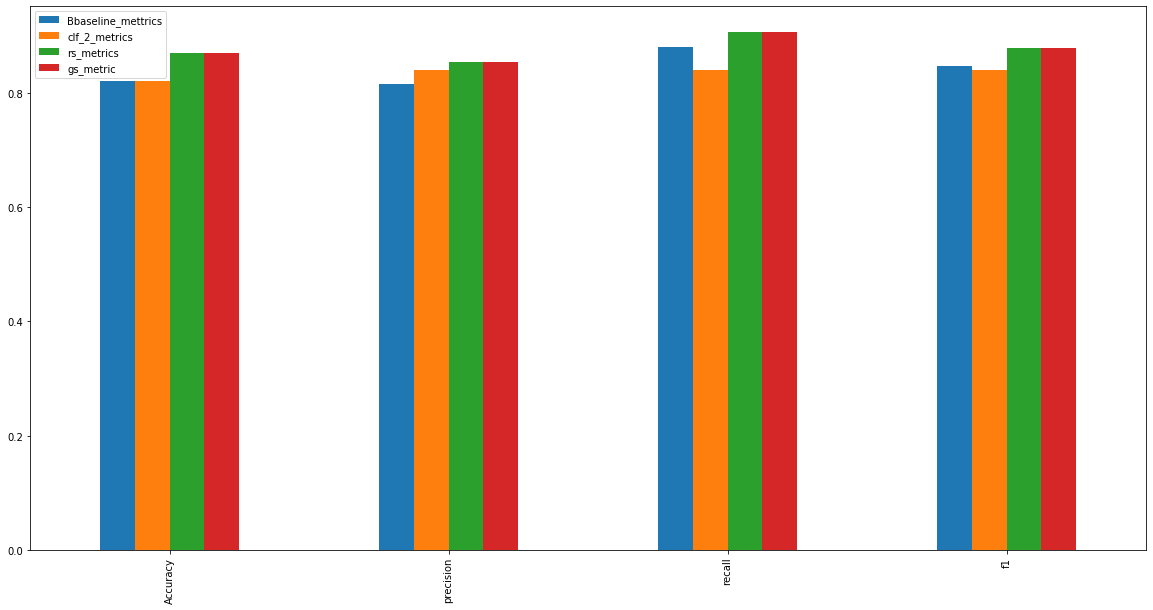

In [178]:
 df_metrics =    pd.DataFrame({
        "Bbaseline_mettrics" : baseline_mettrics,
         "clf_2_metrics" : clf_2_metrics,
        "rs_metrics" : rs_metrics,
        "gs_metric" : gs_metric
                                })
df_metrics.plot.bar(figsize=(20,10))